<a href="https://colab.research.google.com/github/Hrithikgupta323/CodeClause_internship/blob/main/CODECLAUSE_CREDIT_CARD_FRAUD_DETECTION_USING_ML_AND_PYTHON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import difflib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('dark_background')

In [28]:
import sklearn
import scipy
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42
LABELS = ["Normal", "Fraud"]

In [3]:
# loading the data from the csv file to apandas dataframe
df = pd.read_csv('creditcard.csv')

In [4]:
# printing the first 5 rows of the dataframe
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
print(df.columns)


Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [6]:
# number of rows and columns in the data frame

df.shape

(284807, 31)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [9]:
df.drop_duplicates(inplace = True)
df.shape

(283726, 31)

In [10]:
df = df.sample(frac=0.1, random_state = 1)
print(df.shape)
print(df.describe())

(28373, 31)
                Time            V1            V2            V3            V4  \
count   28373.000000  28373.000000  28373.000000  28373.000000  28373.000000   
mean    94564.332323      0.004300     -0.003840      0.001549     -0.007872   
std     47376.490678      1.932902      1.650566      1.521519      1.412812   
min         0.000000    -35.548539    -60.464618    -48.325589     -5.401678   
25%     53849.000000     -0.927559     -0.602418     -0.880092     -0.861837   
50%     84585.000000      0.002275      0.062558      0.177949     -0.019246   
75%    138898.000000      1.317587      0.797430      1.017514      0.731128   
max    172784.000000      2.420064     17.930550      4.069865     16.875344   

                 V5            V6            V7            V8            V9  \
count  28373.000000  28373.000000  28373.000000  28373.000000  28373.000000   
mean       0.000308     -0.012293      0.011225      0.009624     -0.007141   
std        1.498726      1.382

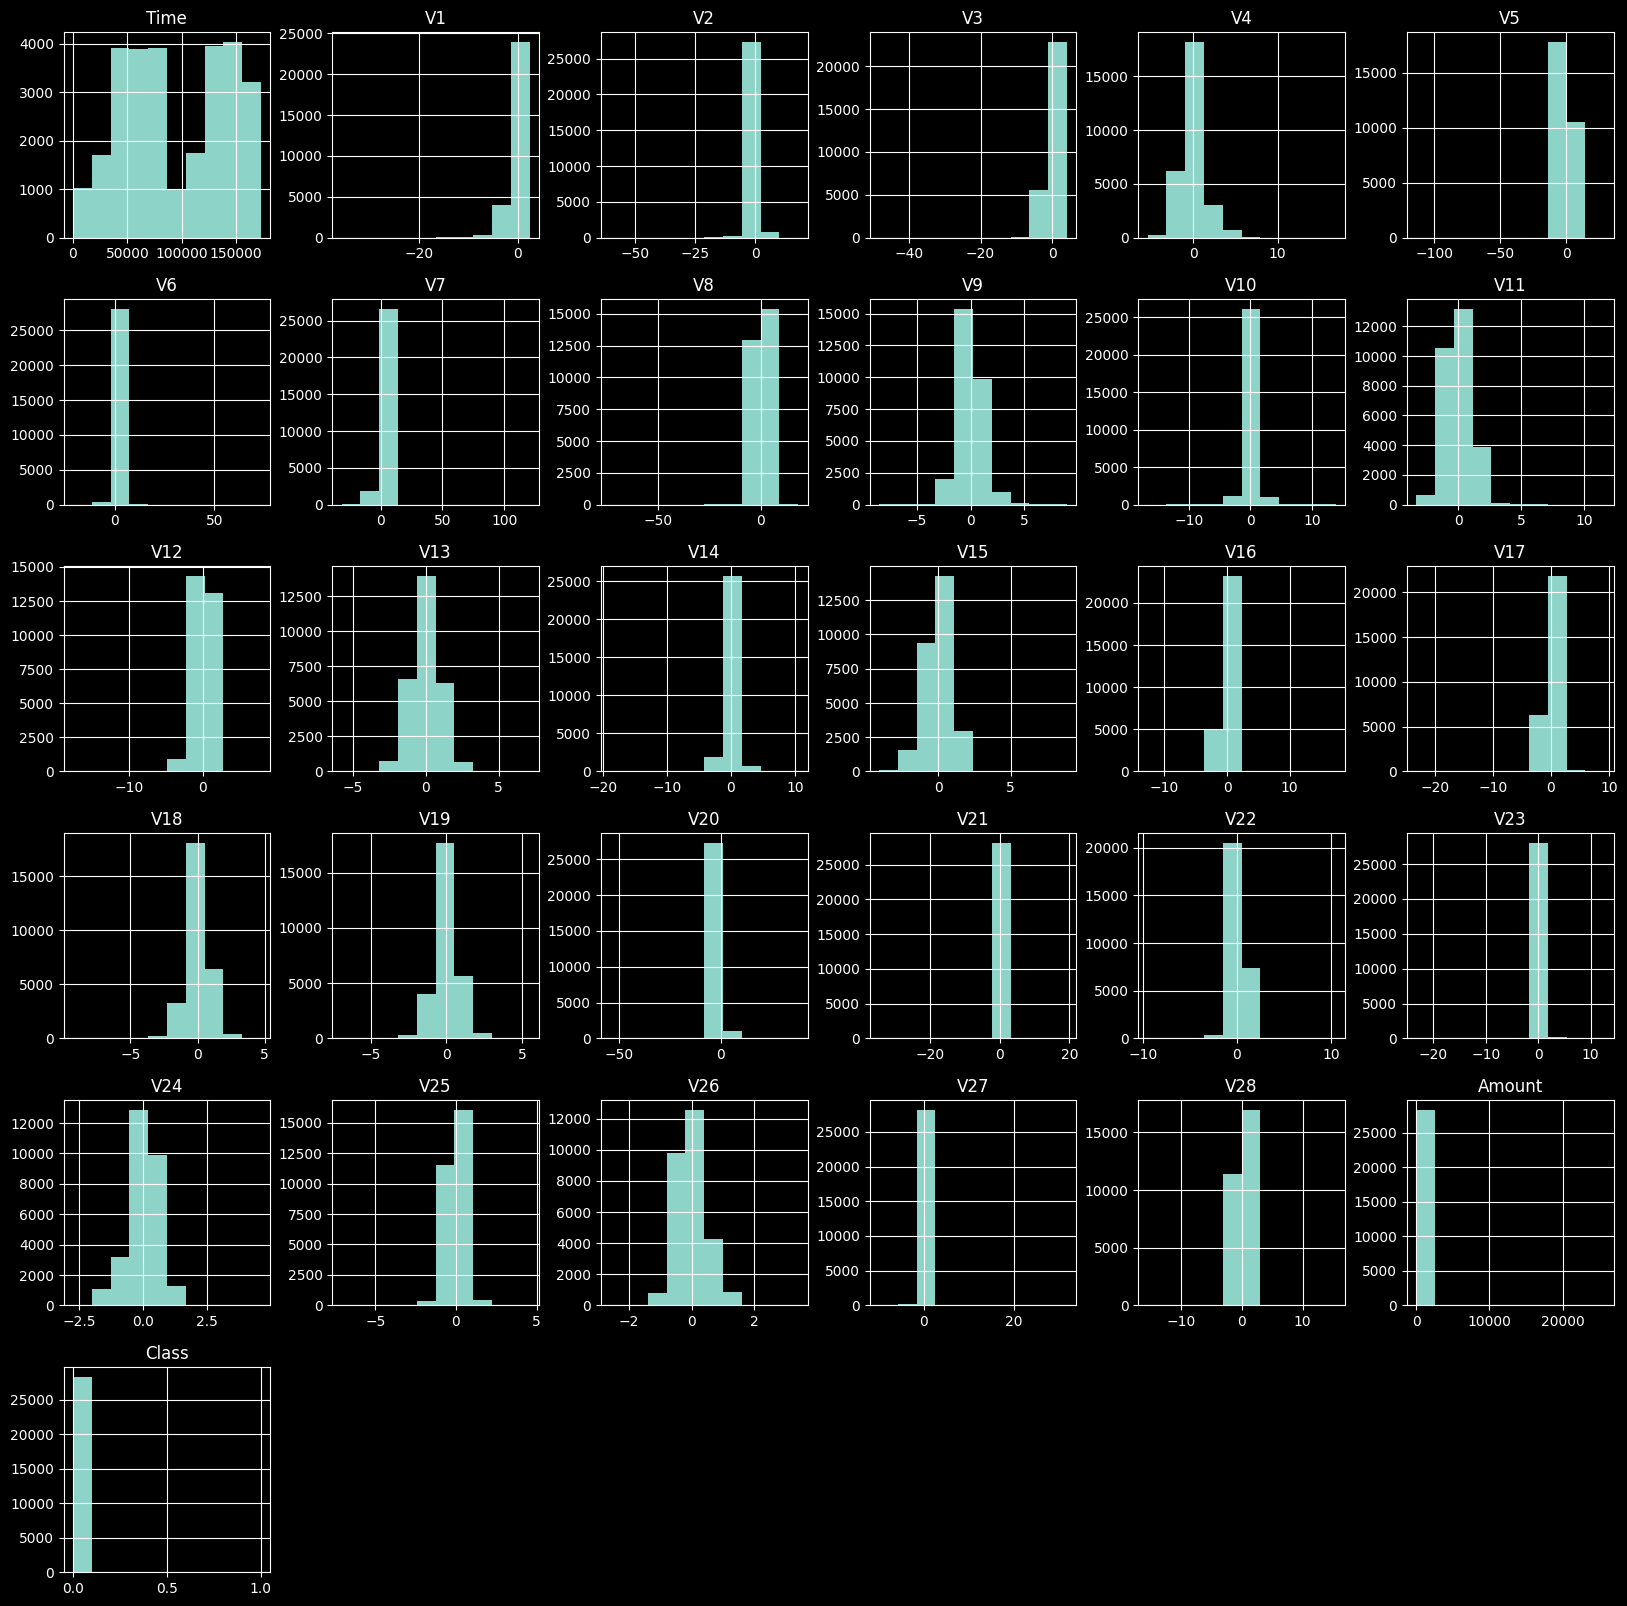

In [13]:
# Plot histograms of each parameter
df.hist(figsize = (20, 20))
plt.show()

In [14]:
# Determine no. of fraud cases in our dataset
Fraud = df[df['Class'] == 1]
Valid = df[df['Class'] == 0]
outlier_fraction = len(Fraud)/float(len(Valid))
print(outlier_fraction)
print('Fraud Cases: {}'.format(len(df[df['Class'] == 1])))
print('Valid Transactions: {}'.format(len(df[df['Class'] == 0])))

0.001411781315074295
Fraud Cases: 40
Valid Transactions: 28333


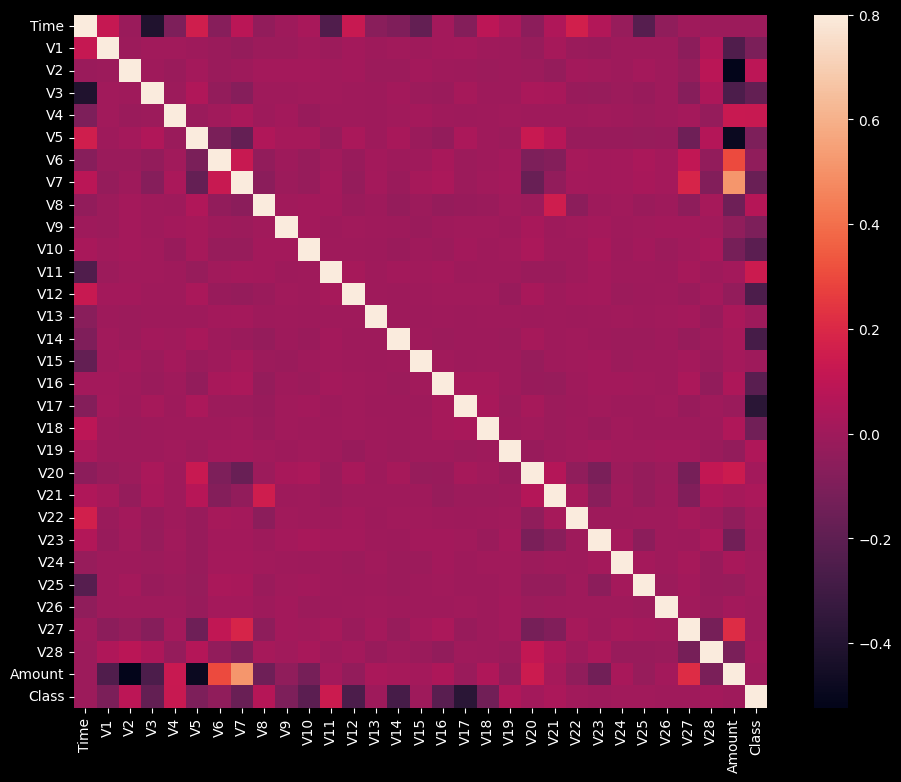

In [15]:
# Correlation matrix in our given dataset
corrmat = df.corr()

fig = plt.figure(figsize = (12, 9))

sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

In [16]:
# Get all the columns from the dataFrame
columns = df.columns.tolist()

# Filter the columns to remove data we do not want
columns = [c for c in columns if c not in ["Class"]]

In [17]:
# Store the variable we'll be predicting on
target = "Class"

X = df[columns]
Y = df[target]

# Print shapes
print(X.shape)
print(Y.shape)

from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

(28373, 30)
(28373,)


In [18]:
# define random states
state = 1

In [19]:
# define outlier detection tools to be compared
classifiers = {
    "Isolation Forest": IsolationForest(max_samples=len(X),
                                        contamination=outlier_fraction,
                                        random_state=state),
    "Local Outlier Factor": LocalOutlierFactor(
        n_neighbors=20,
        contamination=outlier_fraction)}

plt.figure(figsize=(9, 7))
n_outliers = len(Fraud)


for i, (clf_name, clf) in enumerate(classifiers.items()):

    # fit the data and tag outliers
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X)
        scores_pred = clf.negative_outlier_factor_
    else:
        clf.fit(X)
        scores_pred = clf.decision_function(X)
        y_pred = clf.predict(X)

    # Reshape the prediction values to 0 for valid, 1 for fraud.
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1

    n_errors = (y_pred != Y).sum()

    # Run classification metrics
    print('{}: {}'.format(clf_name, n_errors))
    print(accuracy_score(Y, y_pred))
    print(classification_report(Y, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Isolation Forest: 53
0.9981320269270081
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28333
           1       0.34      0.35      0.35        40

    accuracy                           1.00     28373
   macro avg       0.67      0.67      0.67     28373
weighted avg       1.00      1.00      1.00     28373

Local Outlier Factor: 81
0.997145173228069
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28333
           1       0.00      0.00      0.00        40

    accuracy                           1.00     28373
   macro avg       0.50      0.50      0.50     28373
weighted avg       1.00      1.00      1.00     28373



<Figure size 900x700 with 0 Axes>

Text(0, 0.5, 'Frequency')

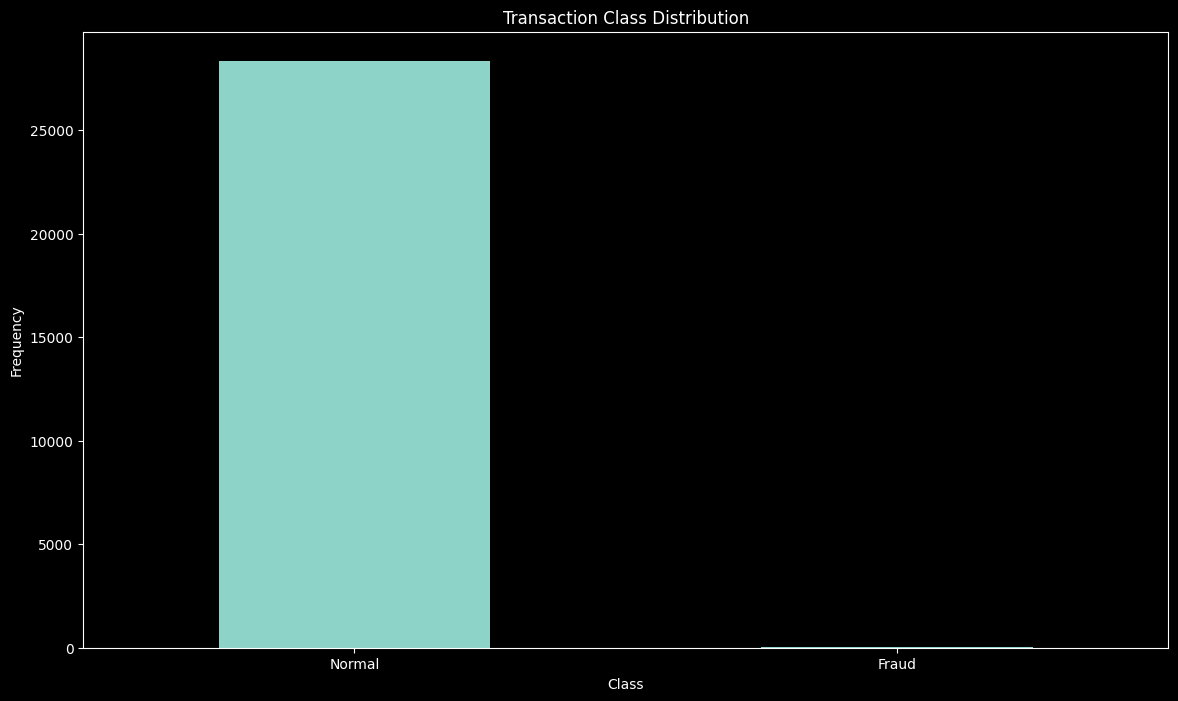

In [29]:
count_classes = pd.value_counts(df['Class'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Transaction Class Distribution")

plt.xticks(range(2), LABELS)

plt.xlabel("Class")

plt.ylabel("Frequency")

In [31]:
## Get the Fraud and the normal dataset

fraud = df[df['Class']==1]

normal = df[df['Class']==0]

In [32]:
print(fraud.shape,normal.shape)

(40, 31) (28333, 31)


In [33]:
## We need to analyze more amount of information from the transaction data
#How different are the amount of money used in different transaction classes?
fraud.Amount.describe()

count     40.000000
mean      96.392250
std      119.768888
min        0.000000
25%        1.602500
50%       52.240000
75%      141.080000
max      489.710000
Name: Amount, dtype: float64

In [34]:
normal.Amount.describe()

count    28333.00000
mean        89.17664
std        289.58493
min          0.00000
25%          5.81000
50%         22.02000
75%         77.20000
max      25691.16000
Name: Amount, dtype: float64

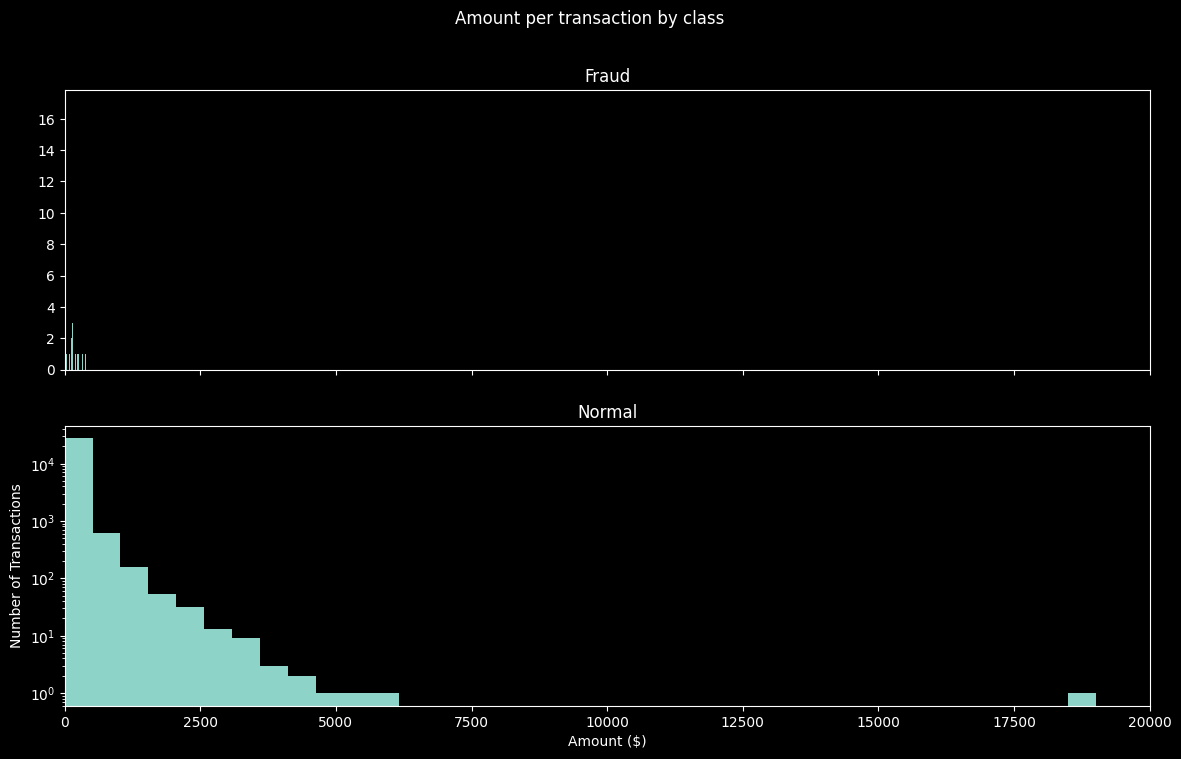

In [35]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
bins = 50
ax1.hist(fraud.Amount, bins = bins)
ax1.set_title('Fraud')
ax2.hist(normal.Amount, bins = bins)
ax2.set_title('Normal')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

In [38]:
## Take some sample of the data

df1= df.sample(frac = 0.1,random_state=1)

df1.shape

(2837, 31)

In [39]:
df.shape

(28373, 31)

In [40]:
#Determine the number of fraud and valid transactions in the dataset

Fraud = df1[df1['Class']==1]

Valid = df1[df1['Class']==0]

outlier_fraction = len(Fraud)/float(len(Valid))

In [41]:
print(outlier_fraction)

print("Fraud Cases : {}".format(len(Fraud)))

print("Valid Cases : {}".format(len(Valid)))

0.004247787610619469
Fraud Cases : 12
Valid Cases : 2825


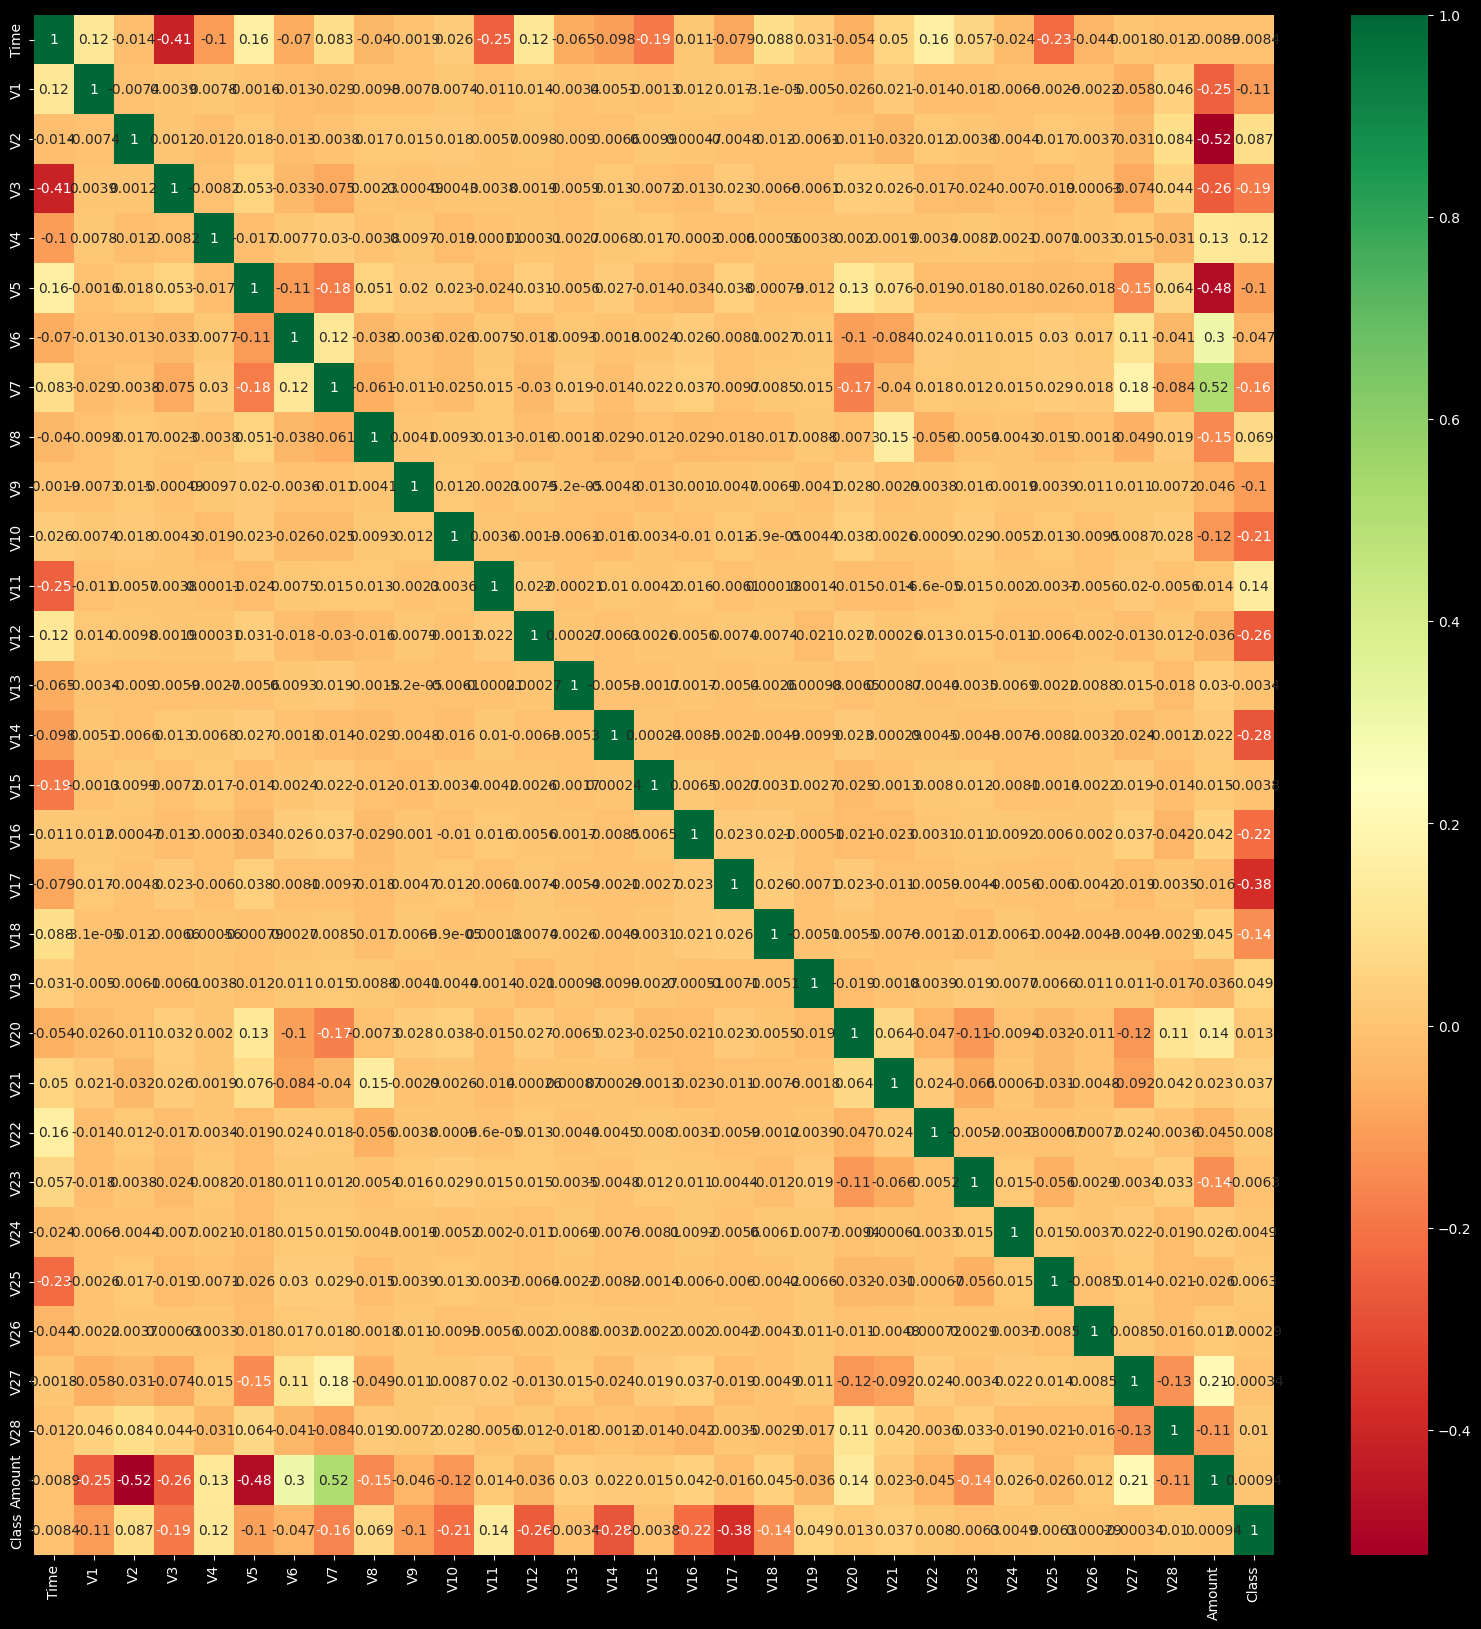

In [42]:
## Correlation
import seaborn as sns
#get correlations of each features in dataset
corrmat = df1.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [43]:
#Create independent and Dependent Features
columns = df1.columns.tolist()
# Filter the columns to remove data we do not want
columns = [c for c in columns if c not in ["Class"]]
# Store the variable we are predicting
target = "Class"
# Define a random state
state = np.random.RandomState(42)
X = df1[columns]
Y = df1[target]
X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))
# Print the shapes of X & Y
print(X.shape)
print(Y.shape)

(2837, 30)
(2837,)


In [46]:
##Define the outlier detection methods

classifiers = {
    "Isolation Forest":IsolationForest(n_estimators=100, max_samples=len(X),
                                       contamination=outlier_fraction,random_state=state, verbose=0),
    "Local Outlier Factor":LocalOutlierFactor(n_neighbors=20, algorithm='auto',
                                              leaf_size=30, metric='minkowski',
                                              p=2, metric_params=None, contamination=outlier_fraction)

}

In [45]:
type(classifiers)

dict

In [47]:
n_outliers = len(Fraud)
for i, (clf_name,clf) in enumerate(classifiers.items()):
    #Fit the data and tag outliers
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X)
        scores_prediction = clf.negative_outlier_factor_
    elif clf_name == "Support Vector Machine":
        clf.fit(X)
        y_pred = clf.predict(X)
    else:
        clf.fit(X)
        scores_prediction = clf.decision_function(X)
        y_pred = clf.predict(X)
    #Reshape the prediction values to 0 for Valid transactions , 1 for Fraud transactions
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    n_errors = (y_pred != Y).sum()
    # Run Classification Metrics
    print("{}: {}".format(clf_name,n_errors))
    print("Accuracy Score :")
    print(accuracy_score(Y,y_pred))
    print("Classification Report :")
    print(classification_report(Y,y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Isolation Forest: 19
Accuracy Score :
0.9933027846316531
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2825
           1       0.23      0.25      0.24        12

    accuracy                           0.99      2837
   macro avg       0.61      0.62      0.62      2837
weighted avg       0.99      0.99      0.99      2837

Local Outlier Factor: 25
Accuracy Score :
0.9911878745153331
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2825
           1       0.00      0.00      0.00        12

    accuracy                           0.99      2837
   macro avg       0.50      0.50      0.50      2837
weighted avg       0.99      0.99      0.99      2837

